In [17]:
%load_ext autoreload
%autoreload
import tools as tools
import core as core

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# Open dataset and filter for europe
# range=> [) is open on the right side so +1 to remember
ds = tools.open_dataset(months=range(1,12+1))
ds_eu = tools.filter_europe_box(ds)

In [26]:
# Main pvpot calculation and grouping
pvpot_pre = core.pv_pot(ds_eu).groupby(ds_eu.valid_time.dt.month).sum("valid_time") / (30*24)

In [20]:
# Do the proper computation
pvpot = tools.dask_compute(pvpot_pre)

<Client: 'tcp://127.0.0.1:42277' processes=20 threads=80, memory=753.83 GiB>
Execution time: 8.45223 seconds


In [21]:
tools.print_pvpot_stats(pvpot)

Calculated pvpot:
    Shape: (3, 141, 161)
    Months: 3
    Min: 0.1841234266757965
    Mean: 62.760009765625
    Max: 180.1937255859375
    Std: 42.31721878051758
    


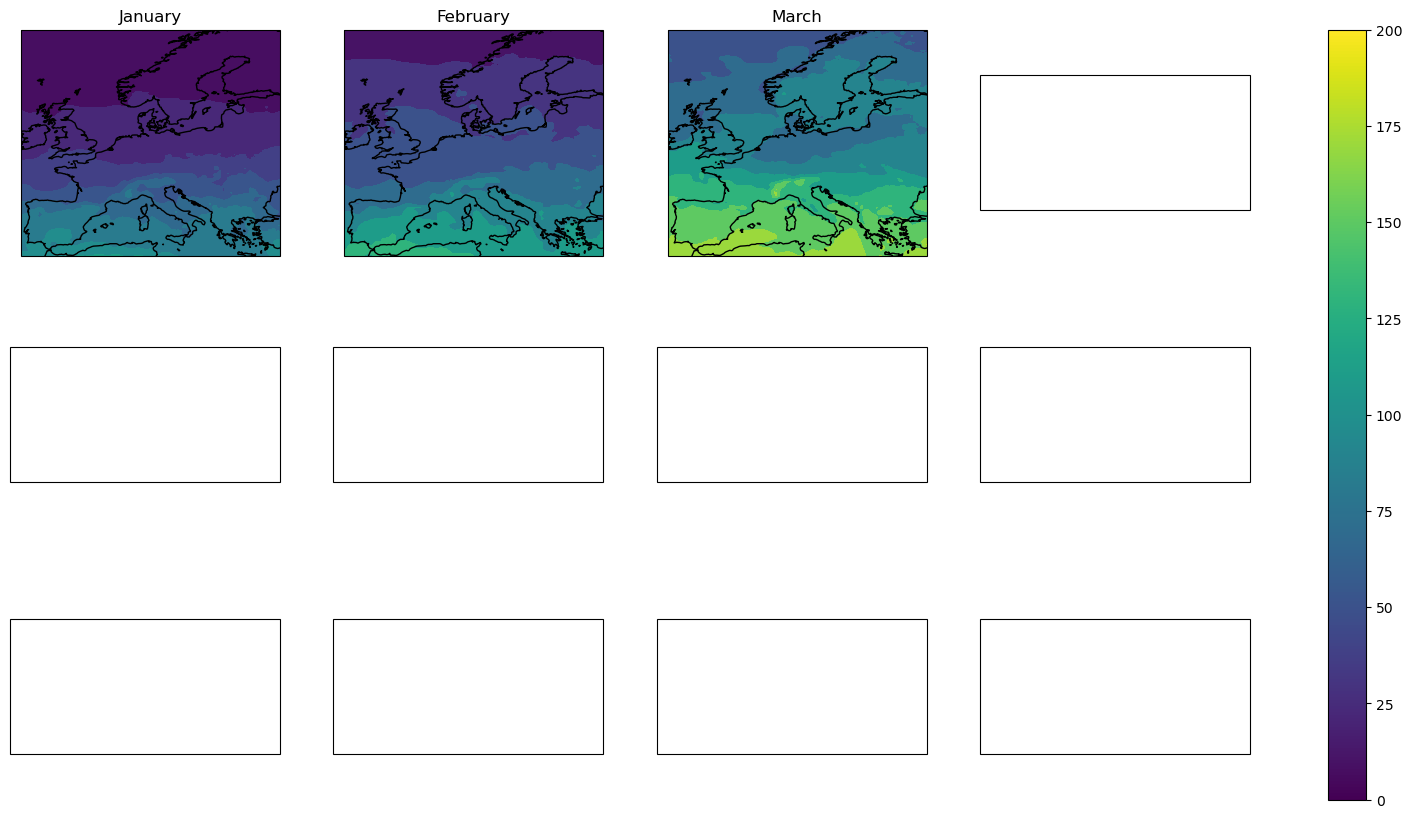

In [23]:
tools.plot_pvpot_per_month(pvpot, 0, 200)